In [89]:
import matplotlib.pyplot as plt
from collections import defaultdict

In [90]:
resnet_50_log = """
     1  train Loss: 1.7434 Acc: 0.4768
     2  val Loss: 1.5059 Acc: 0.5227
     3  train Loss: 1.3484 Acc: 0.5338
     4  val Loss: 1.1898 Acc: 0.5676
     5  train Loss: 1.1348 Acc: 0.5929
     6  val Loss: 1.0318 Acc: 0.6504
     7  train Loss: 1.0181 Acc: 0.6512
     8  val Loss: 0.9492 Acc: 0.6718
     9  train Loss: 0.9400 Acc: 0.6878
    10  val Loss: 0.8943 Acc: 0.6872
    11  train Loss: 0.8995 Acc: 0.6959
    12  val Loss: 0.8622 Acc: 0.6992
    13  train Loss: 0.8576 Acc: 0.7134
    14  val Loss: 0.8234 Acc: 0.7149
    15  train Loss: 0.8296 Acc: 0.7246
    16  val Loss: 0.7994 Acc: 0.7218
    17  train Loss: 0.7961 Acc: 0.7357
    18  val Loss: 0.7763 Acc: 0.7341
    19  train Loss: 0.7792 Acc: 0.7378
    20  val Loss: 0.7630 Acc: 0.7364
    21  train Loss: 0.7577 Acc: 0.7447
    22  val Loss: 0.7616 Acc: 0.7372
    23  train Loss: 0.7517 Acc: 0.7437
    24  val Loss: 0.7412 Acc: 0.7435
    25  train Loss: 0.7283 Acc: 0.7562
    26  val Loss: 0.7212 Acc: 0.7506
    27  train Loss: 0.7183 Acc: 0.7550
    28  val Loss: 0.7185 Acc: 0.7486
    29  train Loss: 0.7176 Acc: 0.7597
    30  val Loss: 0.6971 Acc: 0.7566
    31  train Loss: 0.6976 Acc: 0.7625
    32  val Loss: 0.7024 Acc: 0.7598
    33  train Loss: 0.6960 Acc: 0.7639
    34  val Loss: 0.7025 Acc: 0.7549
    35  train Loss: 0.6896 Acc: 0.7599
    36  val Loss: 0.6928 Acc: 0.7538
    37  train Loss: 0.6776 Acc: 0.7682
    38  val Loss: 0.6723 Acc: 0.7635
    39  train Loss: 0.6736 Acc: 0.7678
    40  val Loss: 0.6697 Acc: 0.7661
    41  train Loss: 0.6605 Acc: 0.7762
    42  val Loss: 0.6689 Acc: 0.7638
    43  train Loss: 0.6557 Acc: 0.7775
    44  val Loss: 0.6649 Acc: 0.7721
    45  train Loss: 0.6612 Acc: 0.7705
    46  val Loss: 0.6570 Acc: 0.7795
    47  train Loss: 0.6440 Acc: 0.7828
    48  val Loss: 0.6425 Acc: 0.7823
    49  train Loss: 0.6394 Acc: 0.7794
    50  val Loss: 0.6403 Acc: 0.7769
    51  train Loss: 0.6273 Acc: 0.7846
    52  val Loss: 0.6453 Acc: 0.7775
    53  train Loss: 0.6358 Acc: 0.7836
    54  val Loss: 0.6394 Acc: 0.7795
    55  train Loss: 0.6209 Acc: 0.7875
    56  val Loss: 0.6381 Acc: 0.7806
    57  train Loss: 0.6321 Acc: 0.7839
    58  val Loss: 0.6450 Acc: 0.7763
    59  train Loss: 0.6289 Acc: 0.7817
    60  val Loss: 0.6265 Acc: 0.7866
    61  train Loss: 0.6204 Acc: 0.7853
    62  val Loss: 0.6231 Acc: 0.7875
    63  train Loss: 0.6113 Acc: 0.7897
    64  val Loss: 0.6290 Acc: 0.7841
    65  train Loss: 0.6134 Acc: 0.7880
    66  val Loss: 0.6225 Acc: 0.7858
    67  train Loss: 0.6091 Acc: 0.7883
    68  val Loss: 0.6126 Acc: 0.7912
    69  train Loss: 0.6117 Acc: 0.7864
    70  val Loss: 0.6069 Acc: 0.7935
    71  train Loss: 0.6112 Acc: 0.7905
    72  val Loss: 0.6114 Acc: 0.7909
    73  train Loss: 0.6059 Acc: 0.7862
    74  val Loss: 0.6128 Acc: 0.7886
    75  train Loss: 0.5998 Acc: 0.7935
    76  val Loss: 0.6022 Acc: 0.7981
    77  train Loss: 0.6008 Acc: 0.7961
    78  val Loss: 0.6034 Acc: 0.7943
    79  train Loss: 0.5896 Acc: 0.7979
    80  val Loss: 0.5989 Acc: 0.7923
    81  train Loss: 0.5933 Acc: 0.7941
    82  val Loss: 0.6055 Acc: 0.7898
    83  train Loss: 0.5849 Acc: 0.7993
    84  val Loss: 0.5983 Acc: 0.7941
    85  train Loss: 0.5916 Acc: 0.7965
    86  val Loss: 0.5981 Acc: 0.7901
    87  train Loss: 0.5832 Acc: 0.7932
    88  val Loss: 0.5945 Acc: 0.7963
    89  train Loss: 0.5815 Acc: 0.8011
    90  val Loss: 0.5989 Acc: 0.7929
    91  train Loss: 0.5776 Acc: 0.8034
    92  val Loss: 0.5945 Acc: 0.7958
    93  train Loss: 0.5808 Acc: 0.8005
    94  val Loss: 0.5925 Acc: 0.7955
    95  train Loss: 0.5720 Acc: 0.8014
    96  val Loss: 0.5813 Acc: 0.7986
    97  train Loss: 0.5722 Acc: 0.8045
    98  val Loss: 0.5785 Acc: 0.8021
    99  train Loss: 0.5726 Acc: 0.8034
   100  val Loss: 0.5955 Acc: 0.7946
   101  train Loss: 0.5714 Acc: 0.8014
   102  val Loss: 0.5839 Acc: 0.7986
   103  train Loss: 0.5785 Acc: 0.8019
   104  val Loss: 0.5734 Acc: 0.8058
   105  train Loss: 0.5636 Acc: 0.8025
   106  val Loss: 0.5710 Acc: 0.8066
   107  train Loss: 0.5647 Acc: 0.8061
   108  val Loss: 0.5759 Acc: 0.7995
   109  train Loss: 0.5671 Acc: 0.8045
   110  val Loss: 0.5850 Acc: 0.7946
   111  train Loss: 0.5658 Acc: 0.8084
   112  val Loss: 0.5810 Acc: 0.7958
   113  train Loss: 0.5663 Acc: 0.8037
   114  val Loss: 0.5802 Acc: 0.8015
   115  train Loss: 0.5688 Acc: 0.8000
   116  val Loss: 0.5750 Acc: 0.8035
   117  train Loss: 0.5614 Acc: 0.8081
   118  val Loss: 0.5745 Acc: 0.8012
   119  train Loss: 0.5503 Acc: 0.8072
   120  val Loss: 0.5653 Acc: 0.8078
   121  train Loss: 0.5576 Acc: 0.8110
   122  val Loss: 0.5694 Acc: 0.8026
   123  train Loss: 0.5515 Acc: 0.8098
   124  val Loss: 0.5774 Acc: 0.8018
   125  train Loss: 0.5643 Acc: 0.8080
   126  val Loss: 0.5784 Acc: 0.7969
   127  train Loss: 0.5477 Acc: 0.8120
   128  val Loss: 0.5673 Acc: 0.8075
   129  train Loss: 0.5585 Acc: 0.8073
   130  val Loss: 0.5596 Acc: 0.8112
   131  train Loss: 0.5435 Acc: 0.8106
   132  val Loss: 0.5627 Acc: 0.8069
   133  train Loss: 0.5462 Acc: 0.8113
   134  val Loss: 0.5557 Acc: 0.8118
   135  train Loss: 0.5497 Acc: 0.8105
   136  val Loss: 0.5671 Acc: 0.8015
   137  train Loss: 0.5477 Acc: 0.8090
   138  val Loss: 0.5607 Acc: 0.8075
   139  train Loss: 0.5495 Acc: 0.8094
   140  val Loss: 0.5627 Acc: 0.8063
   141  train Loss: 0.5540 Acc: 0.8103
   142  val Loss: 0.5646 Acc: 0.8043
   143  train Loss: 0.5453 Acc: 0.8114
   144  val Loss: 0.5775 Acc: 0.7966
   145  train Loss: 0.5348 Acc: 0.8175
   146  val Loss: 0.5767 Acc: 0.7995
   147  train Loss: 0.5514 Acc: 0.8085
   148  val Loss: 0.5834 Acc: 0.7941
   149  train Loss: 0.5403 Acc: 0.8119
   150  val Loss: 0.5545 Acc: 0.8126
   151  train Loss: 0.5433 Acc: 0.8129
   152  val Loss: 0.5514 Acc: 0.8121
   153  train Loss: 0.5309 Acc: 0.8175
   154  val Loss: 0.5531 Acc: 0.8072
   155  train Loss: 0.5334 Acc: 0.8185
   156  val Loss: 0.5502 Acc: 0.8126
   157  train Loss: 0.5281 Acc: 0.8199
   158  val Loss: 0.5574 Acc: 0.8072
   159  train Loss: 0.5368 Acc: 0.8139
   160  val Loss: 0.5482 Acc: 0.8183
   161  train Loss: 0.5419 Acc: 0.8133
   162  val Loss: 0.5481 Acc: 0.8143
   163  train Loss: 0.5309 Acc: 0.8162
   164  val Loss: 0.5445 Acc: 0.8166
   165  train Loss: 0.5319 Acc: 0.8185
   166  val Loss: 0.5481 Acc: 0.8126
   167  train Loss: 0.5297 Acc: 0.8159
   168  val Loss: 0.5561 Acc: 0.8069
   169  train Loss: 0.5396 Acc: 0.8141
   170  val Loss: 0.5710 Acc: 0.8009
   171  train Loss: 0.5386 Acc: 0.8125
   172  val Loss: 0.5571 Acc: 0.8081
   173  train Loss: 0.5310 Acc: 0.8193
   174  val Loss: 0.5547 Acc: 0.8115
   175  train Loss: 0.5267 Acc: 0.8181
   176  val Loss: 0.5421 Acc: 0.8135
   177  train Loss: 0.5287 Acc: 0.8198
   178  val Loss: 0.5437 Acc: 0.8112
   179  train Loss: 0.5297 Acc: 0.8213
   180  val Loss: 0.5596 Acc: 0.8015
   181  train Loss: 0.5313 Acc: 0.8157
   182  val Loss: 0.5610 Acc: 0.8018
   183  train Loss: 0.5169 Acc: 0.8199
   184  val Loss: 0.5483 Acc: 0.8129
   185  train Loss: 0.5328 Acc: 0.8171
   186  val Loss: 0.5469 Acc: 0.8135
   187  train Loss: 0.5195 Acc: 0.8234
   188  val Loss: 0.5325 Acc: 0.8195
   189  train Loss: 0.5224 Acc: 0.8232
   190  val Loss: 0.5346 Acc: 0.8163
   191  train Loss: 0.5195 Acc: 0.8194
   192  val Loss: 0.5603 Acc: 0.7998
   193  train Loss: 0.5234 Acc: 0.8239
   194  val Loss: 0.5699 Acc: 0.8006
   195  train Loss: 0.5228 Acc: 0.8187
   196  val Loss: 0.5389 Acc: 0.8146
   197  train Loss: 0.5201 Acc: 0.8178
   198  val Loss: 0.5337 Acc: 0.8229
   199  train Loss: 0.5219 Acc: 0.8170
   200  val Loss: 0.5307 Acc: 0.8229
"""

In [91]:
resnet_101_log = """
     1  train Loss: 1.8451 Acc: 0.4686
     2  val Loss: 1.5625 Acc: 0.5421
     3  train Loss: 1.3869 Acc: 0.5312
     4  val Loss: 1.1939 Acc: 0.5958
     5  train Loss: 1.1588 Acc: 0.6001
     6  val Loss: 1.0264 Acc: 0.6390
     7  train Loss: 1.0158 Acc: 0.6563
     8  val Loss: 0.9289 Acc: 0.6838
     9  train Loss: 0.9300 Acc: 0.6915
    10  val Loss: 0.8597 Acc: 0.7092
    11  train Loss: 0.8810 Acc: 0.7061
    12  val Loss: 0.8163 Acc: 0.7298
    13  train Loss: 0.8331 Acc: 0.7232
    14  val Loss: 0.7914 Acc: 0.7304
    15  train Loss: 0.8004 Acc: 0.7355
    16  val Loss: 0.7683 Acc: 0.7375
    17  train Loss: 0.7804 Acc: 0.7361
    18  val Loss: 0.7371 Acc: 0.7492
    19  train Loss: 0.7590 Acc: 0.7473
    20  val Loss: 0.7189 Acc: 0.7621
    21  train Loss: 0.7286 Acc: 0.7597
    22  val Loss: 0.7070 Acc: 0.7581
    23  train Loss: 0.7282 Acc: 0.7570
    24  val Loss: 0.7021 Acc: 0.7558
    25  train Loss: 0.7107 Acc: 0.7630
    26  val Loss: 0.6832 Acc: 0.7658
    27  train Loss: 0.6866 Acc: 0.7715
    28  val Loss: 0.6649 Acc: 0.7821
    29  train Loss: 0.6794 Acc: 0.7732
    30  val Loss: 0.6617 Acc: 0.7741
    31  train Loss: 0.6744 Acc: 0.7697
    32  val Loss: 0.6565 Acc: 0.7763
    33  train Loss: 0.6634 Acc: 0.7753
    34  val Loss: 0.6409 Acc: 0.7858
    35  train Loss: 0.6524 Acc: 0.7782
    36  val Loss: 0.6303 Acc: 0.7906
    37  train Loss: 0.6525 Acc: 0.7814
    38  val Loss: 0.6272 Acc: 0.7921
    39  train Loss: 0.6427 Acc: 0.7837
    40  val Loss: 0.6193 Acc: 0.7943
    41  train Loss: 0.6332 Acc: 0.7853
    42  val Loss: 0.6313 Acc: 0.7852
    43  train Loss: 0.6304 Acc: 0.7855
    44  val Loss: 0.6097 Acc: 0.7941
    45  train Loss: 0.6185 Acc: 0.7904
    46  val Loss: 0.6034 Acc: 0.7926
    47  train Loss: 0.6202 Acc: 0.7860
    48  val Loss: 0.6074 Acc: 0.7901
    49  train Loss: 0.6072 Acc: 0.7938
    50  val Loss: 0.5901 Acc: 0.8043
    51  train Loss: 0.6067 Acc: 0.7989
    52  val Loss: 0.5983 Acc: 0.7972
    53  train Loss: 0.6119 Acc: 0.7918
    54  val Loss: 0.6058 Acc: 0.7955
    55  train Loss: 0.5952 Acc: 0.7974
    56  val Loss: 0.6057 Acc: 0.7978
    57  train Loss: 0.5891 Acc: 0.8002
    58  val Loss: 0.5875 Acc: 0.8032
    59  train Loss: 0.5924 Acc: 0.7974
    60  val Loss: 0.5845 Acc: 0.8063
    61  train Loss: 0.5814 Acc: 0.7977
    62  val Loss: 0.5752 Acc: 0.8118
    63  train Loss: 0.5886 Acc: 0.7989
    64  val Loss: 0.5684 Acc: 0.8118
    65  train Loss: 0.5798 Acc: 0.8033
    66  val Loss: 0.5715 Acc: 0.8043
    67  train Loss: 0.5788 Acc: 0.8005
    68  val Loss: 0.5691 Acc: 0.8061
    69  train Loss: 0.5841 Acc: 0.7980
    70  val Loss: 0.5629 Acc: 0.8072
    71  train Loss: 0.5728 Acc: 0.8056
    72  val Loss: 0.5596 Acc: 0.8098
    73  train Loss: 0.5682 Acc: 0.8076
    74  val Loss: 0.5736 Acc: 0.7995
    75  train Loss: 0.5660 Acc: 0.8086
    76  val Loss: 0.5658 Acc: 0.8072
    77  train Loss: 0.5660 Acc: 0.8083
    78  val Loss: 0.5745 Acc: 0.8029
    79  train Loss: 0.5556 Acc: 0.8104
    80  val Loss: 0.5817 Acc: 0.7955
    81  train Loss: 0.5601 Acc: 0.8074
    82  val Loss: 0.5770 Acc: 0.8018
    83  train Loss: 0.5626 Acc: 0.8077
    84  val Loss: 0.5505 Acc: 0.8152
    85  train Loss: 0.5511 Acc: 0.8097
    86  val Loss: 0.5419 Acc: 0.8163
    87  train Loss: 0.5515 Acc: 0.8150
    88  val Loss: 0.5468 Acc: 0.8158
    89  train Loss: 0.5524 Acc: 0.8115
    90  val Loss: 0.5466 Acc: 0.8141
    91  train Loss: 0.5440 Acc: 0.8142
    92  val Loss: 0.5461 Acc: 0.8132
    93  train Loss: 0.5469 Acc: 0.8107
    94  val Loss: 0.5582 Acc: 0.8083
    95  train Loss: 0.5408 Acc: 0.8156
    96  val Loss: 0.5515 Acc: 0.8109
    97  train Loss: 0.5445 Acc: 0.8108
    98  val Loss: 0.5434 Acc: 0.8132
    99  train Loss: 0.5517 Acc: 0.8117
   100  val Loss: 0.5538 Acc: 0.8075
   101  train Loss: 0.5451 Acc: 0.8108
   102  val Loss: 0.5457 Acc: 0.8098
   103  train Loss: 0.5387 Acc: 0.8156
   104  val Loss: 0.5335 Acc: 0.8155
"""

In [92]:
logs = {
    'resnet50' : resnet_50_log,
    'resnet101': resnet_101_log
}

In [93]:
histories = {}
for name, log in logs.items():
    histories[name] = {
        'train_losses' : [],
        'val_losses' : [],
        'train_accuracies' : [],
        'val_accuracies' : [],
    }

    for line in log.split('\n'):
        if len(line) == 0: continue
        first_colon = line.index(':')
        next_space = line.index(' ', first_colon+2)
        next_colon = line.index(':', next_space)
        loss = float(line[first_colon+2:next_space])
        accuracy = float(line[next_colon+2:])
        if line[8] == 't':
            histories[name]['train_losses'].append(loss)
            histories[name]['train_accuracies'].append(accuracy)
        else: 
            histories[name]['val_losses'].append(loss)
            histories[name]['val_accuracies'].append(accuracy)



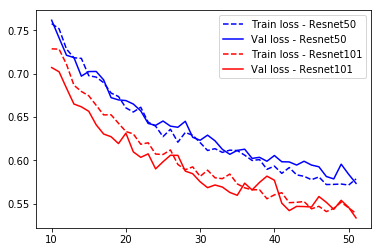

In [94]:
train_losses_50 = histories['resnet50']['train_losses']
val_losses_50 = histories['resnet50']['val_losses']
train_losses_101 = histories['resnet101']['train_losses']
val_losses_101 = histories['resnet101']['val_losses']

n = len(train_losses_101)
n_to_skip = 10

plt.plot(range(n_to_skip,n), train_losses_50[n_to_skip:n], 'b--', label='Train loss - Resnet50')
plt.plot(range(n_to_skip,n), val_losses_50[n_to_skip:n], 'b', label='Val loss - Resnet50')
plt.plot(range(n_to_skip,n), train_losses_101[n_to_skip:n],'r--', label='Train loss - Resnet101')
plt.plot(range(n_to_skip,n), val_losses_101[n_to_skip:n], 'r', label='Val loss - Resnet101')
plt.legend()
plt.show()

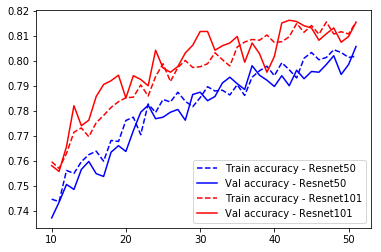

In [95]:
train_accuracies_50 = histories['resnet50']['train_accuracies']
val_accuracies_50 = histories['resnet50']['val_accuracies']
train_accuracies_101 = histories['resnet101']['train_accuracies']
val_accuracies_101 = histories['resnet101']['val_accuracies']

n = len(train_accuracies_101)
n_to_skip = 10

plt.plot(range(n_to_skip,n), train_accuracies_50[n_to_skip:n], 'b--', label='Train accuracy - Resnet50')
plt.plot(range(n_to_skip,n), val_accuracies_50[n_to_skip:n], 'b', label='Val accuracy - Resnet50')
plt.plot(range(n_to_skip,n), train_accuracies_101[n_to_skip:n],'r--', label='Train accuracy - Resnet101')
plt.plot(range(n_to_skip,n), val_accuracies_101[n_to_skip:n], 'r', label='Val accuracy - Resnet101')
plt.legend()
plt.show()